In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import networkx as nx


from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd



GENERALES

id_vivienda	Identificación vivienda
area Area rural o urbana
region Region
tot_per_h Total de personas en el hogar
p1  Indique tipo de acceso a la vivienda 


INGRESOS DEL TRABAJO


y0101h Asalariados principal - Sueldos y salarios monetario del hogar
y0301h	Asalariados principal - Horas extras del hogar
y0302h	Asalariados 
principal - Comisiones del hogar
y0303h	Asalariados principal - Propinas del hogar


SUBSIDIOS Y APOYO DEL ESTADO


yfamh	Asignación familiar del hogar
y2001h	Subsidio familiar al menor o recién nacido del hogar
y2301h	Bono base familiar del hogar
y2604h	Ingreso Familiar de Emergencia del hogar
y2701h	Otro subsidio del Estado del hogar


PENSION Y JUBILACIONES


y2803h	Jubilación o pensión de vejez del hogar
ymon02h	Montepío o pensión de viudez del hogar
y280202h	Aporte Previsional Solidario de Vejez del hogar
y2804h	Pensión Básica Solidaria de Invalidez del hogar
y280101h	Pensión Garantizada Universal del hogar

PROPIEDADES


yre1h	Arriendos de propiedades urbanas del hogar
yre2h	Arriendos de propiedades agrícolas del hogar


OTROS INGRESOS

ytroh	Remuneración por trabajos ocasionales del hogar
yah2h	Dividendo por acciones o bonos financieros del hogar
yruth	Retiro de utilidades del hogar


INDICADORES DE NECESIDADES Y CONSUMO

yac2h	Consumo de productos agrícolas del hogar
y2401h	Subsidio Agua Potable del hogar


INDICADORES DE VIVIENDA Y SERVICIOS


yaimh	Alquiler imputado del hogar
y0304h	Asalariados principal - Asignación por vivienda, transporte, educación del hogar


MEDICION DE PROBREZA Y BIENESTAR 


ytoth	Ingreso total del hogar
ypc	Ingreso total per cápita del hogar corregido
pobreza	Categoría de pobreza
li	Linea de indigencia
lp	Linea de pobreza
nae	Numero de adultos equivalentes
yae	Ingreso por adulto equivalente



COLUMNAS QUE TENEMOS ACTUALMENTE

id_vivienda	Identificación vivienda
area Area rural o urbana
region Region
tot_per_h Total de personas en el hogar
p1  Indique tipo de acceso a la vivienda 

v1	v1. ¿Cuál es el tipo de vivienda que ocupa la persona entrevistada?	1	1. Casa aislada (no pareada)
		2	2. Casa pareada por un lado
		3	3. Casa pareada por ambos lados
		4	4. Departamento en edificio con ascensor
		5	5. Departamento en edificio sin ascensor
		6	6. Pieza en casa antigua, en conventillo, en galpón o espacio subdividido
		7	7. Mediagua, mejora o vivienda de emergencia
		8	8. Vivienda tradicional indígena
		9	9. Rancho o choza
		10	10. Vivienda precaria de materiales reutilizados (latas, plásticos, cartones, etc.)

v9	v9. Su hogar, ¿bajo qué situación ocupa el sitio o terreno?	1	1. Propio pagado
		2	2. Propio pagándose
		3	3. Propio compartido (pagado) con otras viviendas del sitio
		4	4. Propio compartido (pagándose) con otras viviendas del sitio
		5	5. Arrendado con contrato
		6	6. Arrendado sin contrato
		7	7. Cedido por servicio o trabajo
		8	8. Cedido por familiar u otro
		9	9. Usufructo (sólo uso y goce)
		10	10. Ocupación irregular (de hecho)
		11	11. Poseedor irregular


v13	v13. Su hogar, ¿bajo qué situación ocupa la vivienda?	1	1. Propia
		2	2. Arrendada
		3	3. Cedida
		9	9. Usufructo (sólo uso y goce)
		10	10. Ocupación irregular (de hecho)
		11	11. Poseedor irregular

v20	v20. ¿De dónde proviene el agua de la vivienda?	1	1. Red pública
		4	4. Pozo o noria
		5	5. Río, vertiente, lago, estero o aguas lluvia
		6	6. Camión aljibe
		7	7. Otra fuente. ¿Cuál? Especifique


v34a	v34a. ¿Qué combustible o fuente de energía usa habitualmente para cocinar?	1	1. Gas licuado (cilindro o tanque individual)
		2	2. Gas por red (de cañería)
		3	3. Parafina (kerosene) o petróleo
		4	4. Carbón, leña o derivados (pellets, astillas o briquetas)
		5	5. Electricidad
		6	6. Energía solar
		7	7. No usa combustible o fuente de energía
		8	8. No tiene sistema


v34c	v34c. ¿Qué combustible o fuente de energía usa para el sistema de agua caliente?	1	1. Gas licuado (cilindro o tanque individual)
		2	2. Gas por red (de cañería)
		3	3. Parafina (kerosene) o petróleo
		4	4. Carbón, leña o derivados (pellets, astillas o briquetas)
		5	5. Electricidad
		6	6. Energía solar
		7	7. No usa combustible o fuente de energía
		8	8. No tiene sistema
v21	v21. ¿Cómo obtiene el agua?	1	1. De una empresa sanitaria (con tratamiento)
		2	2. De un Sistema de Agua Potable Rural (APR) (con tratamiento)
		3	3. De otro sistema comunitario o particular (con tratamiento)
		4	4. De una fuente natural (sin tratamiento)
        
v22	v22. ¿Cuál es el sistema de distribución del agua en la vivienda?	1	1. Con llave dentro de la vivienda
		2	2. Con llave dentro del sitio, pero fuera de la vivienda
		3	3. No tiene sistema, la acarrea


In [2]:
# Cargar los datos
file_path = 'datos/data-case.csv'
data = pd.read_csv(file_path)


# Definir columnas relevantes para hogares incluyendo las nuevas variables seleccionadas
columnas_hogares = [
    'id_vivienda', 'area', 'region', 'tot_per_h', 'p1', 'v1', 'v9', 'v13', 'v20', 'v34a', 'v34c', 'n_nucleos', 'v21', 'v22',
    'y0101h', 'y0301h', 'y0302h', 'y0303h', 'yfamh', 'y2001h', 'y2301h', 'y2604h', 'y2701h', 'y2803h', 'ymon02h',
    'y280202h', 'y2804h', 'y280101h', 'yre1h', 'yre2h', 'ytroh', 'yah2h', 'yruth', 'yac2h', 'y2401h', 'yaimh', 'y0304h',
    'ytoth', 'ypc', 'pobreza', 'li', 'lp', 'nae', 'yae'
]

# Agrupar por ID de vivienda y tomar el primer registro como representante del hogar
df_hogares = data[columnas_hogares].groupby('id_vivienda').first().reset_index()

# Verificar el DataFrame resultante
print(df_hogares.head())

data.drop(data.index, inplace=True)

/tmp/ipykernel_44999/2501140799.py:3: DtypeWarning: Columns (63,65,109,110,157,164,185,195,263,323,335,403,448,537,582,628,630) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


   id_vivienda  area  region  tot_per_h   p1   v1   v9  v13  v20  v34a  ...  \
0    1000901.0   2.0    16.0        3.0  1.0  1.0  1.0  1.0  1.0   1.0  ...   
1    1000902.0   2.0    16.0        4.0  1.0  1.0  1.0  1.0  1.0   1.0  ...   
2    1000903.0   2.0    16.0        3.0  1.0  1.0  1.0  1.0  1.0   1.0  ...   
3    1000904.0   2.0    16.0        2.0  1.0  2.0  1.0  1.0  1.0   1.0  ...   
4    1000905.0   2.0    16.0        1.0  1.0  1.0  1.0  1.0  1.0   1.0  ...   

   y2401h     yaimh  y0304h     ytoth       ypc  pobreza        li        lp  \
0  4000.0  150000.0     0.0  599652.0  336965.0      3.0  144566.0  216849.0   
1     0.0       0.0     0.0  268192.0  104548.0      2.0  144566.0  216849.0   
2     0.0  150000.0     0.0  550000.0  183333.0      3.0  144566.0  216849.0   
3  2000.0  150000.0     0.0  935935.0  467968.0      3.0  144566.0  216849.0   
4     0.0       0.0     0.0  130000.0  280000.0      3.0  144566.0  216849.0   

        nae       yae  
0  2.157669  468512.

In [19]:
# Creando un diccionario con los datos de las regiones de Chile

regiones_chile = {
    1: "Región de Tarapacá",
    2: "Región de Antofagasta",
    3: "Región de Atacama",
    4: "Región de Coquimbo",
    5: "Región de Valparaíso",
    6: "Región del Libertador Gral. Bernardo O'Higgins",
    7: "Región del Maule",
    8: "Región del Biobío",
    9: "Región de La Araucanía",
    10: "Región de Los Lagos",
    11: "Región de Aysén del Gral. Carlos Ibáñez del Campo",
    12: "Región de Magallanes y de la Antártica Chilena",
    13: "Región Metropolitana de Santiago",
    14: "Región de Los Ríos",
    15: "Región de Arica y Parinacota",
    16: "Región de Ñuble"
}



In [3]:

codigo_region = 5

df_hogares_filtrado = df_hogares[df_hogares['region'] == codigo_region]

df_hogares_filtrado.to_csv('df_hogares_quinta.csv', index=False)
df_hogares.to_csv('datos/hogares.csv', index=False)



In [24]:
!pip -q install geopandas

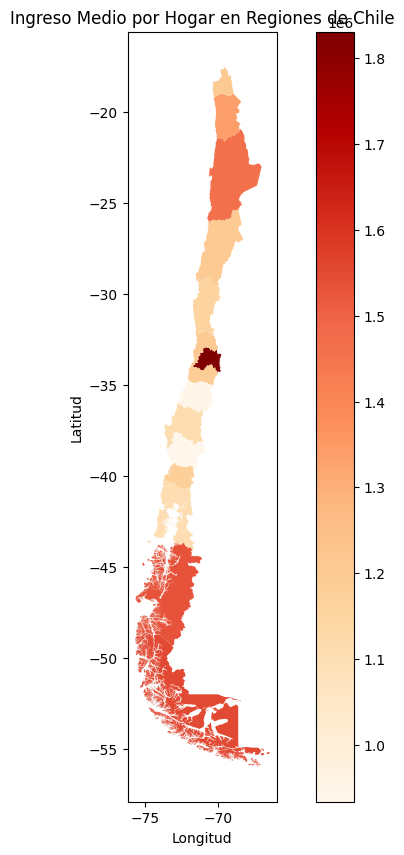

In [28]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Carga el mapa de Chile
chile_regions = gpd.read_file("datos/regiones.shp")

# Asegúrate de que la columna 'region' en df_hogares es del mismo tipo que la columna 'COD_REGI' en chile_regions
df_hogares['region'] = df_hogares['region'].astype(int)

# Agrupa los datos de ingresos por región y calcula la media
ingresos_por_region = df_hogares.groupby('region')['ytoth'].mean().reset_index()

# Cambia el nombre de las columnas para que coincidan con el mapa
ingresos_por_region.columns = ['COD_REGI', 'Ingreso_medio']

# Convierte 'COD_REGI' a tipo entero para asegurar la unión correcta
ingresos_por_region['COD_REGI'] = ingresos_por_region['COD_REGI'].astype(int)

# Une los datos de ingresos con el mapa de regiones
chile_con_ingresos = chile_regions.merge(ingresos_por_region, on='COD_REGI')

# Crea una visualización
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
chile_con_ingresos.plot(ax=ax, column='Ingreso_medio', legend=True, cmap='OrRd')

# Añade títulos y etiquetas
ax.set_title('Ingreso Medio por Hogar en Regiones de Chile')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')


# Muestra el mapa
plt.show()
